<a href="https://colab.research.google.com/github/rahulsingh7111711/backup-tvs/blob/main/M1S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [52]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rahulsingh7111711/Sample_datasets/main/Spilit1.csv'

# Load the full dataset with error handling
try:
    df = pd.read_csv(url, encoding='iso-8859-1', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print("ParserError:", e)
    df = pd.read_csv(url, encoding='iso-8859-1', nrows=50, on_bad_lines='skip')
except Exception as e:
    print("Error:", e)
    df = pd.DataFrame()

In [53]:
df.head()


,DISBMONTH,LOAN_NUMBER,CD_SEGMENT,PRODUCT_CODE,ETC_NTC,PAYMENT_TYPE,CUST_PINCODE,CUST_STATE,MANUFACTURE_CODE,TENUR,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
0,10-31-2022,1,MOBILE,MOBILE,NTC,ADM,517551,AP,OPPO,7,...,0,0,0,0,0,0,0,0,-1.0,0
1,11-30-2022,2,MOBILE,MOBILE,ETC,ADM,517002,AP,SAMSUNG,6,...,4,2,3,2,0,0,4,2,697.0,0
2,10-31-2022,3,MOBILE,MOBILE,ETC,ENCH,517132,AP,OPPO,8,...,0,0,0,0,0,0,0,0,759.0,0
3,10-31-2022,4,MOBILE,MOBILE,ETC,ADM,517130,AP,OPPO,7,...,2,1,2,1,0,0,2,1,775.0,0
4,10-31-2022,5,MOBILE,MOBILE,ETC,ADM,515212,AP,OPPO,7,...,8,2,2,0,2,0,4,0,708.0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113222 entries, 0 to 113221
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DISBMONTH                      113222 non-null  object 
 1   LOAN_NUMBER                    113222 non-null  int64  
 2   CD_SEGMENT                     113222 non-null  object 
 3   PRODUCT_CODE                   113222 non-null  object 
 4   ETC_NTC                        113222 non-null  object 
 5   PAYMENT_TYPE                   113222 non-null  object 
 6   CUST_PINCODE                   113222 non-null  int64  
 7   CUST_STATE                     113222 non-null  object 
 8   MANUFACTURE_CODE               113222 non-null  object 
 9   TENUR                          113222 non-null  int64  
 10  ADVANCE_EMI_COUNT              113222 non-null  int64  
 11  EMI                            113222 non-null  int64  
 12  LTV                           

In [55]:
df.shape

(113222, 49)

In [56]:
df.describe()

,LOAN_NUMBER,CUST_PINCODE,TENUR,ADVANCE_EMI_COUNT,EMI,LTV,ASSET_COST,ACTUAL_LOAN_AMOUNT,DOWN_PAYMENT,CUST_AGE,...,TOTAL_NO_ENQ,TOTAL_NO_ENQ_LAST_3M,TOTAL_NO_ENQ_CD,TOTAL_NO_ENQ_CD_LAST_3M,TOTAL_NO_ENQ_SEC,TOTAL_NO_ENQ_SEC_LAST_3M,TOTAL_NO_ENQ_UNSEC,TOTAL_NO_ENQ_UNSEC_LAST_3M,BUREAU_SCORE,TARGET_VARIABLE
count,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113220.000000,113222.000000,113221.000000,...,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,113222.000000,102565.000000,113222.000000
mean,56611.500000,556312.839536,9.273816,1.751983,2469.507852,77.426589,22770.121187,18470.796352,5970.617380,32.236184,...,3.796850,1.168916,1.453136,0.557992,0.359285,0.067195,3.041538,1.026320,386.608346,0.033368
std,32684.520426,196121.118318,2.625777,1.382980,932.237155,10.536359,10869.850356,8565.699720,4226.682427,8.630231,...,8.139018,2.620772,2.734975,1.204652,1.231893,0.412323,6.955099,2.361212,374.029339,0.179597
min,1.000000,110001.000000,6.000000,0.000000,625.000000,0.000000,7999.000000,6000.000000,118.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,28306.250000,493526.000000,8.000000,1.000000,1820.000000,72.170000,14999.000000,12266.000000,3648.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,56611.500000,518124.000000,8.000000,2.000000,2220.000000,74.770000,18999.000000,15973.000000,5002.000000,30.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,709.000000,0.000000
75%,84916.750000,781136.000000,10.000000,2.000000,2899.000000,84.650000,27500.000000,22013.000000,7351.000000,38.000000,...,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,747.000000,0.000000
max,113222.000000,855117.000000,25.000000,8.000000,12157.000000,100.000000,164900.000000,140948.000000,93641.000000,62.000000,...,229.000000,96.000000,78.000000,43.000000,48.000000,18.000000,209.000000,87.000000,838.000000,1.000000


In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [58]:
# Create an imputer for numerical values
num_imputer = SimpleImputer(strategy='mean')

# Create an imputer for categorical values
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Apply the imputer to categorical columns
cat_cols = df.select_dtypes(include=[object]).columns
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


In [59]:
# Initialize the Label Encoder
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Initialize the Scaler
scaler = StandardScaler()

# Apply the scaler to numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])


In [60]:
df.to_csv('cleaned_dataset.csv', index=False)

df = pd.read_csv('cleaned_dataset.csv')

Change

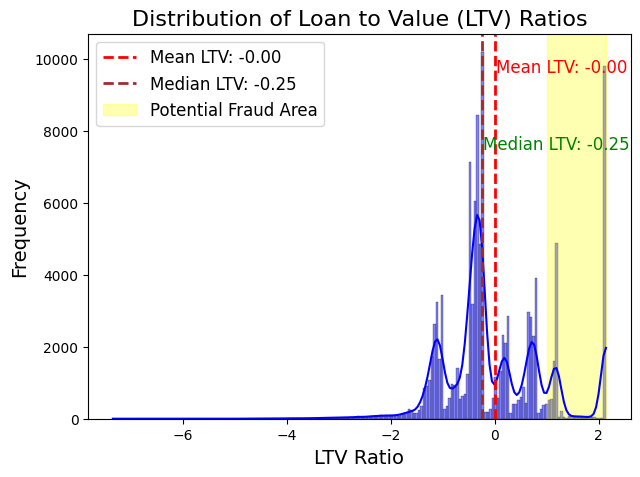

In [61]:
plt.figure(figsize=(7,5))

# Plot the histogram with Kernel Density Estimate (KDE)
sns.histplot(df['LTV'], kde=True, color='blue')

# Title and axis labels
plt.title('Distribution of Loan to Value (LTV) Ratios', fontsize=16)
plt.xlabel('LTV Ratio', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotating the graph
mean_ltv = df['LTV'].mean()
median_ltv = df['LTV'].median()

# Mean annotation
plt.axvline(mean_ltv, color='red', linestyle='--', linewidth=2, label=f'Mean LTV: {mean_ltv:.2f}')
plt.text(mean_ltv + 0.02, plt.ylim()[1]*0.9, f'Mean LTV: {mean_ltv:.2f}', color='red', fontsize=12)

# Median annotation
plt.axvline(median_ltv, color='brown', linestyle='--', linewidth=2, label=f'Median LTV: {median_ltv:.2f}')
plt.text(median_ltv + 0.02, plt.ylim()[1]*0.7, f'Median LTV: {median_ltv:.2f}', color='green', fontsize=12)

# Highlighting potential fraud area (extremely high LTV)
high_ltv_threshold = 1.0  # Assuming LTV above 1.0 might be suspicious
plt.axvspan(high_ltv_threshold, df['LTV'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

# Legend to explain the lines
plt.legend(fontsize=12)

# Display the plot
plt.show()


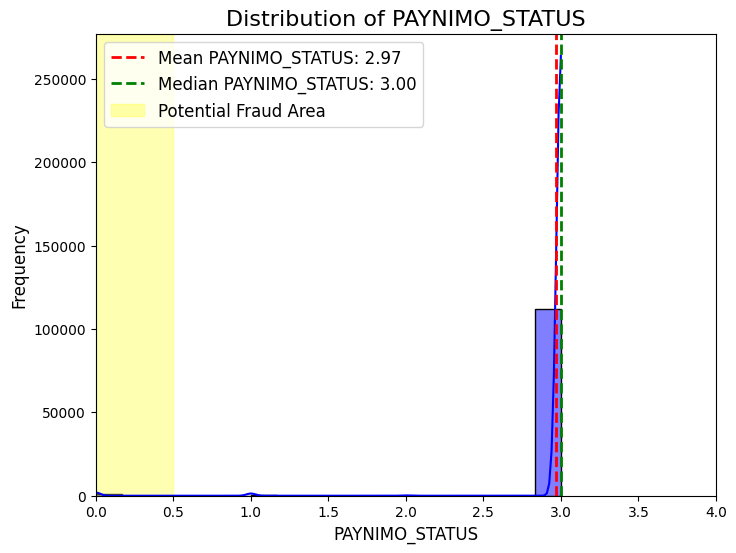

In [62]:
# PAYNIMO_STATUS: Assuming 0.5 or below might indicate invalid verification
plt.figure(figsize=(8,6))

sns.histplot(df['PAYNIMO_STATUS'], kde=True, color='blue')
plt.title('Distribution of PAYNIMO_STATUS', fontsize=16)
plt.xlabel('PAYNIMO_STATUS', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

mean_status = df['PAYNIMO_STATUS'].mean()
median_status = df['PAYNIMO_STATUS'].median()

plt.axvline(mean_status, color='red', linestyle='--', linewidth=2, label=f'Mean PAYNIMO_STATUS: {mean_status:.2f}')
plt.axvline(median_status, color='green', linestyle='--', linewidth=2, label=f'Median PAYNIMO_STATUS: {median_status:.2f}')
plt.axvspan(0, 0.5, color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(0, 4)
plt.show()



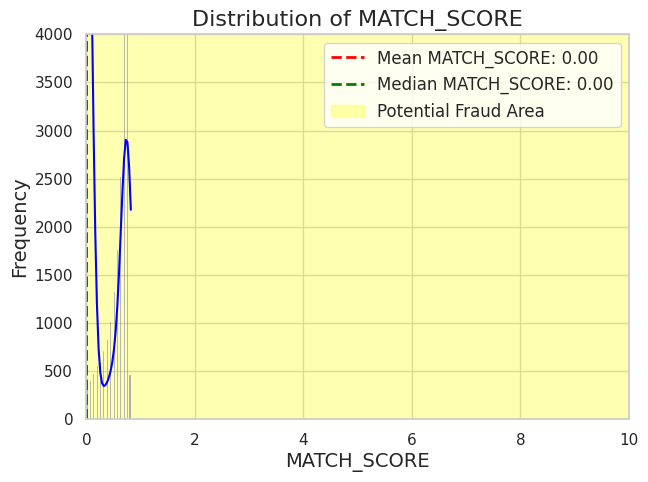

In [74]:
# MATCH_SCORE: Assuming below 50 indicates fraud
plt.figure(figsize=(7,5))

sns.histplot(df['MATCH_SCORE'], kde=True, color='blue')
plt.title('Distribution of MATCH_SCORE', fontsize=16)
plt.xlabel('MATCH_SCORE', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_match = df['MATCH_SCORE'].mean()
median_match = df['MATCH_SCORE'].median()

plt.axvline(mean_match, color='red', linestyle='--', linewidth=2, label=f'Mean MATCH_SCORE: {mean_match:.2f}')
plt.axvline(median_match, color='green', linestyle='--', linewidth=2, label=f'Median MATCH_SCORE: {median_match:.2f}')
plt.axvspan(0, 50, color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(0, 10)
plt.ylim(0, 4000)
plt.show()


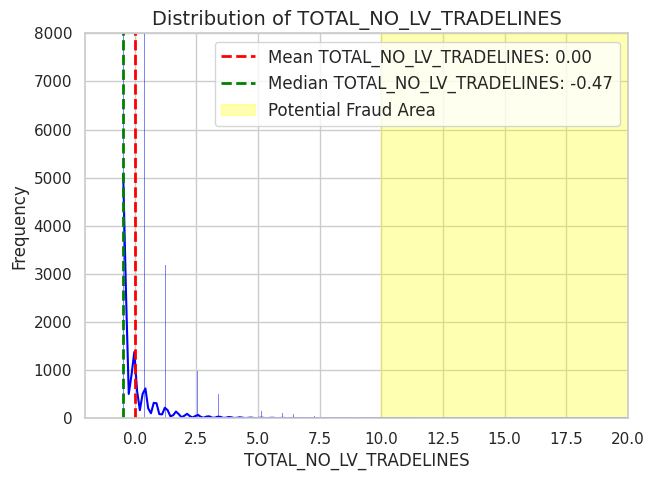

In [82]:
# TOTAL_NO_LV_TRADELINES: Assuming above 10 might indicate fraud
plt.figure(figsize=(7,5))

sns.histplot(df['TOTAL_NO_LV_TRADELINES'], kde=True, color='blue')
plt.title('Distribution of TOTAL_NO_LV_TRADELINES', fontsize=14)
plt.xlabel('TOTAL_NO_LV_TRADELINES', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

mean_tradelines = df['TOTAL_NO_LV_TRADELINES'].mean()
median_tradelines = df['TOTAL_NO_LV_TRADELINES'].median()

plt.axvline(mean_tradelines, color='red', linestyle='--', linewidth=2, label=f'Mean TOTAL_NO_LV_TRADELINES: {mean_tradelines:.2f}')
plt.axvline(median_tradelines, color='green', linestyle='--', linewidth=2, label=f'Median TOTAL_NO_LV_TRADELINES: {median_tradelines:.2f}')
plt.axvspan(10, df['TOTAL_NO_LV_TRADELINES'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-2, 20)
plt.ylim(0,8000)
plt.show()


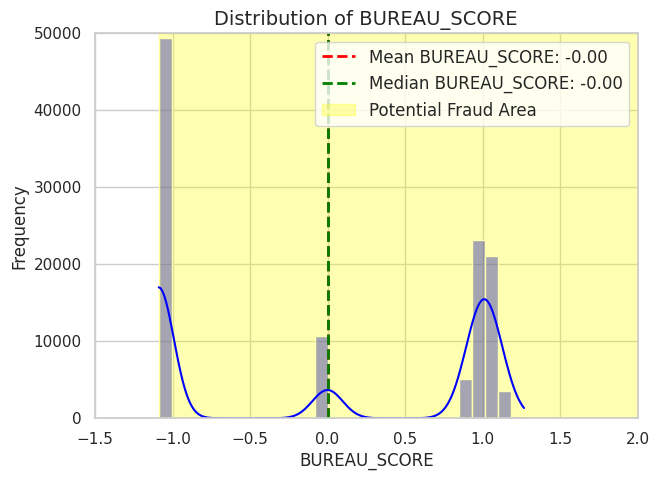

In [93]:
# BUREAU_SCORE: Assuming below 600 might indicate fraud
plt.figure(figsize=(7,5))

sns.histplot(df['BUREAU_SCORE'], kde=True, color='blue')
plt.title('Distribution of BUREAU_SCORE', fontsize=14)
plt.xlabel('BUREAU_SCORE', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

mean_bureau = df['BUREAU_SCORE'].mean()
median_bureau = df['BUREAU_SCORE'].median()

plt.axvline(mean_bureau, color='red', linestyle='--', linewidth=2, label=f'Mean BUREAU_SCORE: {mean_bureau:.2f}')
plt.axvline(median_bureau, color='green', linestyle='--', linewidth=2, label=f'Median BUREAU_SCORE: {median_bureau:.2f}')
plt.axvspan(df['BUREAU_SCORE'].min(), 600, color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-1.5,2)
plt.ylim(0, 50000)
plt.show()


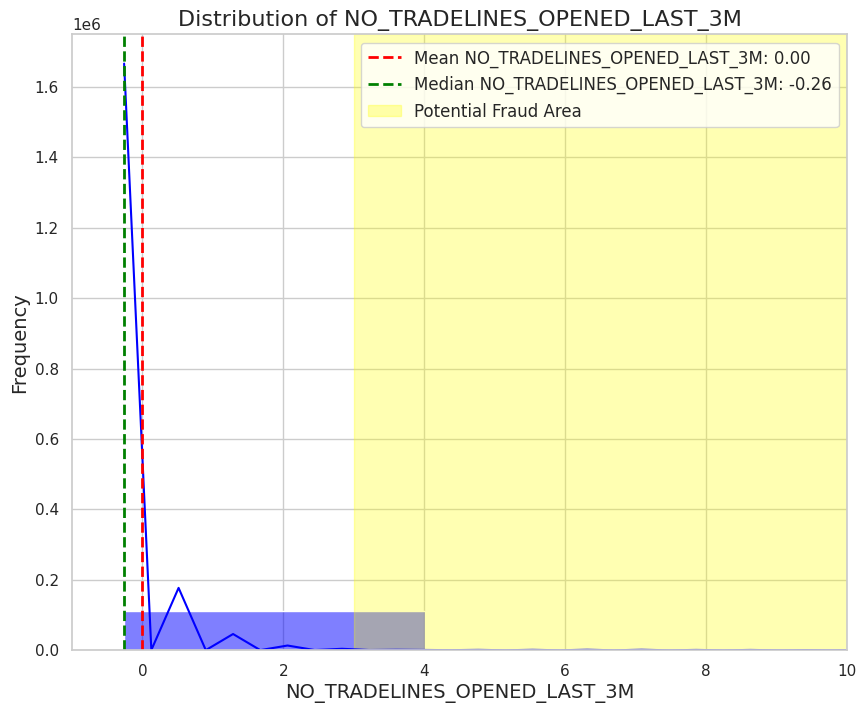

In [97]:
# NO_TRADELINES_OPENED_LAST_3M: Assuming above 3 might indicate fraud
plt.figure(figsize=(10,8))

sns.histplot(df['NO_TRADELINES_OPENED_LAST_3M'], kde=True, color='blue')
plt.title('Distribution of NO_TRADELINES_OPENED_LAST_3M', fontsize=16)
plt.xlabel('NO_TRADELINES_OPENED_LAST_3M', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_tradelines_3m = df['NO_TRADELINES_OPENED_LAST_3M'].mean()
median_tradelines_3m = df['NO_TRADELINES_OPENED_LAST_3M'].median()

plt.axvline(mean_tradelines_3m, color='red', linestyle='--', linewidth=2, label=f'Mean NO_TRADELINES_OPENED_LAST_3M: {mean_tradelines_3m:.2f}')
plt.axvline(median_tradelines_3m, color='green', linestyle='--', linewidth=2, label=f'Median NO_TRADELINES_OPENED_LAST_3M: {median_tradelines_3m:.2f}')
plt.axvspan(3, df['NO_TRADELINES_OPENED_LAST_3M'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-1, 10)
#plt.ylim(0,1.5)
plt.show()


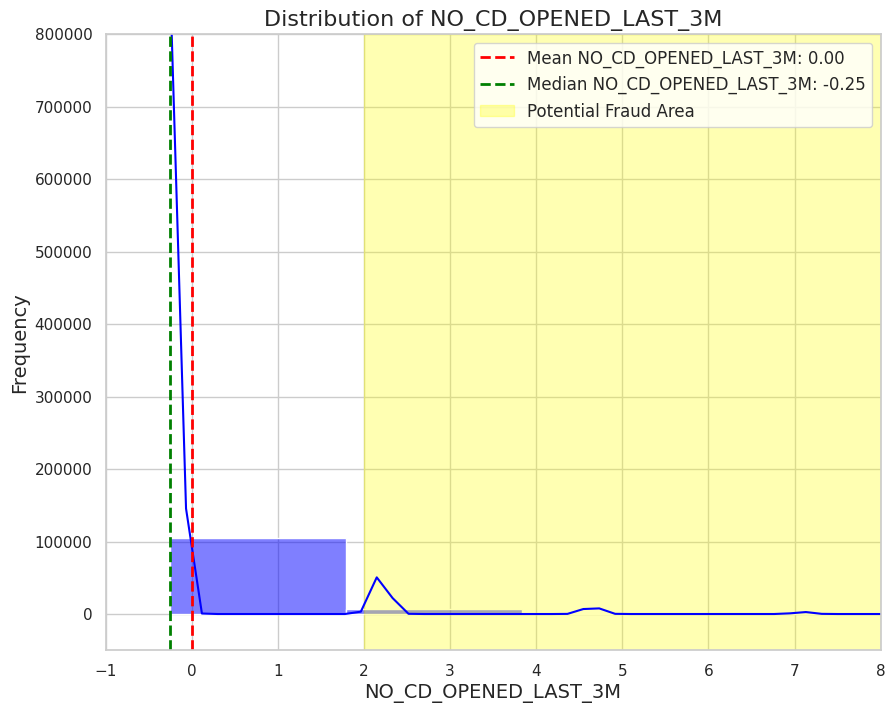

In [105]:
# NO_CD_OPENED_LAST_3M: Assuming above 2 might indicate fraud
plt.figure(figsize=(10,8))

sns.histplot(df['NO_CD_OPENED_LAST_3M'], kde=True, color='blue')
plt.title('Distribution of NO_CD_OPENED_LAST_3M', fontsize=16)
plt.xlabel('NO_CD_OPENED_LAST_3M', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_cd_3m = df['NO_CD_OPENED_LAST_3M'].mean()
median_cd_3m = df['NO_CD_OPENED_LAST_3M'].median()

plt.axvline(mean_cd_3m, color='red', linestyle='--', linewidth=2, label=f'Mean NO_CD_OPENED_LAST_3M: {mean_cd_3m:.2f}')
plt.axvline(median_cd_3m, color='green', linestyle='--', linewidth=2, label=f'Median NO_CD_OPENED_LAST_3M: {median_cd_3m:.2f}')
plt.axvspan(2, df['NO_CD_OPENED_LAST_3M'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-1, 8)
plt.ylim(-50000,800000)
plt.show()


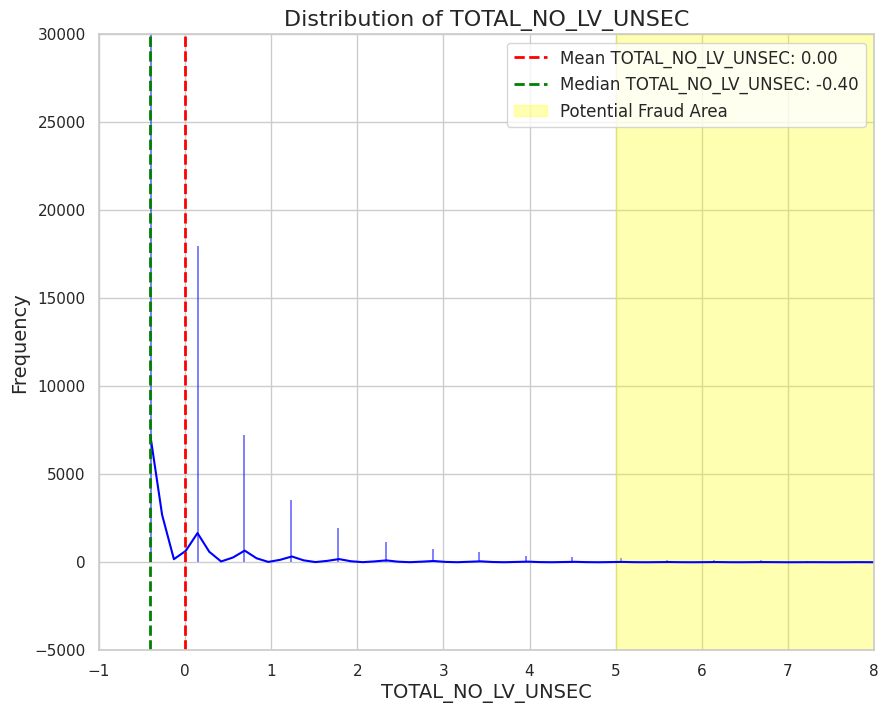

In [111]:
# TOTAL_NO_LV_UNSEC: Assuming above 5 might indicate fraud
plt.figure(figsize=(10,8))

sns.histplot(df['TOTAL_NO_LV_UNSEC'], kde=True, color='blue')
plt.title('Distribution of TOTAL_NO_LV_UNSEC', fontsize=16)
plt.xlabel('TOTAL_NO_LV_UNSEC', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_unsec = df['TOTAL_NO_LV_UNSEC'].mean()
median_unsec = df['TOTAL_NO_LV_UNSEC'].median()

plt.axvline(mean_unsec, color='red', linestyle='--', linewidth=2, label=f'Mean TOTAL_NO_LV_UNSEC: {mean_unsec:.2f}')
plt.axvline(median_unsec, color='green', linestyle='--', linewidth=2, label=f'Median TOTAL_NO_LV_UNSEC: {median_unsec:.2f}')
plt.axvspan(5, df['TOTAL_NO_LV_UNSEC'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-1, 8)
plt.ylim(-5000,30000)
plt.show()


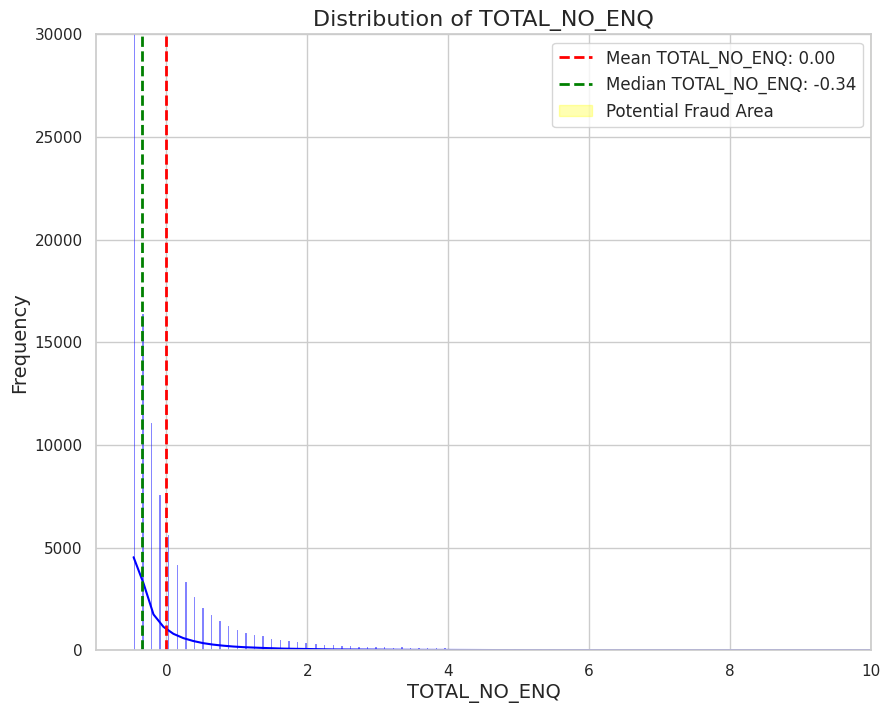

In [115]:
# TOTAL_NO_ENQ: Assuming above 10 might indicate fraud
plt.figure(figsize=(10,8))

sns.histplot(df['TOTAL_NO_ENQ'], kde=True, color='blue')
plt.title('Distribution of TOTAL_NO_ENQ', fontsize=16)
plt.xlabel('TOTAL_NO_ENQ', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_enq = df['TOTAL_NO_ENQ'].mean()
median_enq = df['TOTAL_NO_ENQ'].median()

plt.axvline(mean_enq, color='red', linestyle='--', linewidth=2, label=f'Mean TOTAL_NO_ENQ: {mean_enq:.2f}')
plt.axvline(median_enq, color='green', linestyle='--', linewidth=2, label=f'Median TOTAL_NO_ENQ: {median_enq:.2f}')
plt.axvspan(10, df['TOTAL_NO_ENQ'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-1, 10)
plt.ylim(0,30000)
plt.show()


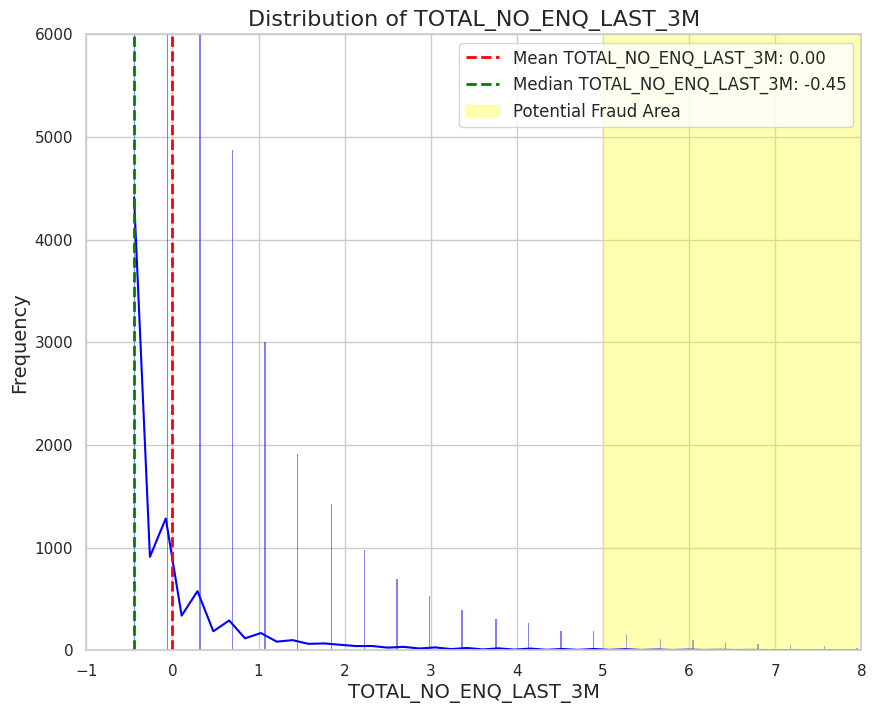

In [126]:
# TOTAL_NO_ENQ_LAST_3M: Assuming above 5 might indicate fraud
plt.figure(figsize=(10,8))

sns.histplot(df['TOTAL_NO_ENQ_LAST_3M'], kde=True, color='blue')
plt.title('Distribution of TOTAL_NO_ENQ_LAST_3M', fontsize=16)
plt.xlabel('TOTAL_NO_ENQ_LAST_3M', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_enq_3m = df['TOTAL_NO_ENQ_LAST_3M'].mean()
median_enq_3m = df['TOTAL_NO_ENQ_LAST_3M'].median()

plt.axvline(mean_enq_3m, color='red', linestyle='--', linewidth=2, label=f'Mean TOTAL_NO_ENQ_LAST_3M: {mean_enq_3m:.2f}')
plt.axvline(median_enq_3m, color='green', linestyle='--', linewidth=2, label=f'Median TOTAL_NO_ENQ_LAST_3M: {median_enq_3m:.2f}')
plt.axvspan(5, df['TOTAL_NO_ENQ_LAST_3M'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-1, 8)
#plt.ylim(-2000,10000)
plt.ylim(0,6000)

plt.show()


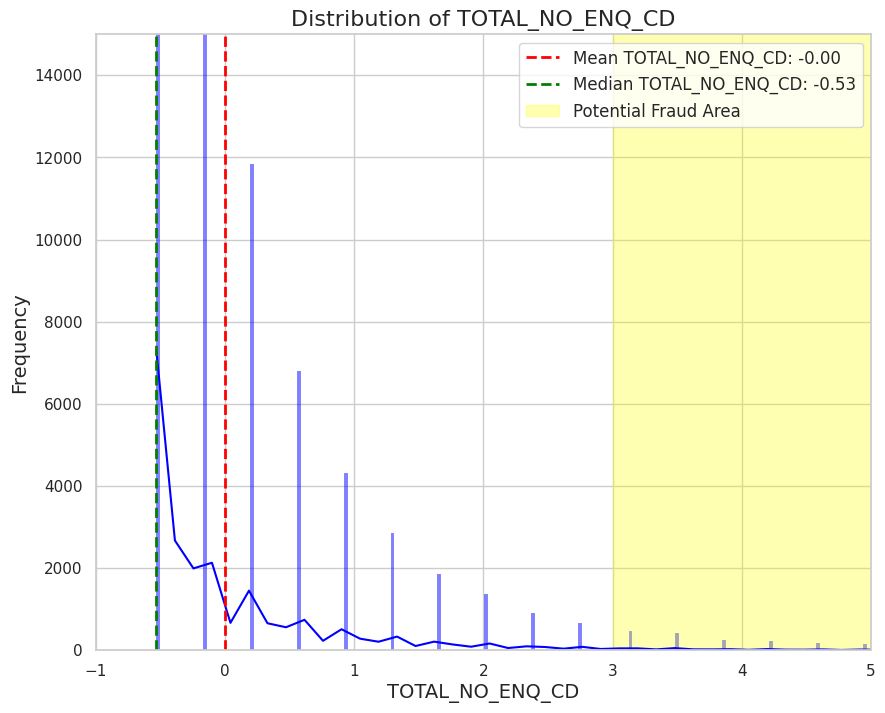

In [129]:
# TOTAL_NO_ENQ_CD: Assuming above 3 might indicate fraud
plt.figure(figsize=(10,8))

sns.histplot(df['TOTAL_NO_ENQ_CD'], kde=True, color='blue')
plt.title('Distribution of TOTAL_NO_ENQ_CD', fontsize=16)
plt.xlabel('TOTAL_NO_ENQ_CD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_enq_cd = df['TOTAL_NO_ENQ_CD'].mean()
median_enq_cd = df['TOTAL_NO_ENQ_CD'].median()

plt.axvline(mean_enq_cd, color='red', linestyle='--', linewidth=2, label=f'Mean TOTAL_NO_ENQ_CD: {mean_enq_cd:.2f}')
plt.axvline(median_enq_cd, color='green', linestyle='--', linewidth=2, label=f'Median TOTAL_NO_ENQ_CD: {median_enq_cd:.2f}')
plt.axvspan(3, df['TOTAL_NO_ENQ_CD'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-1, 5)
plt.ylim(0,15000)
plt.show()


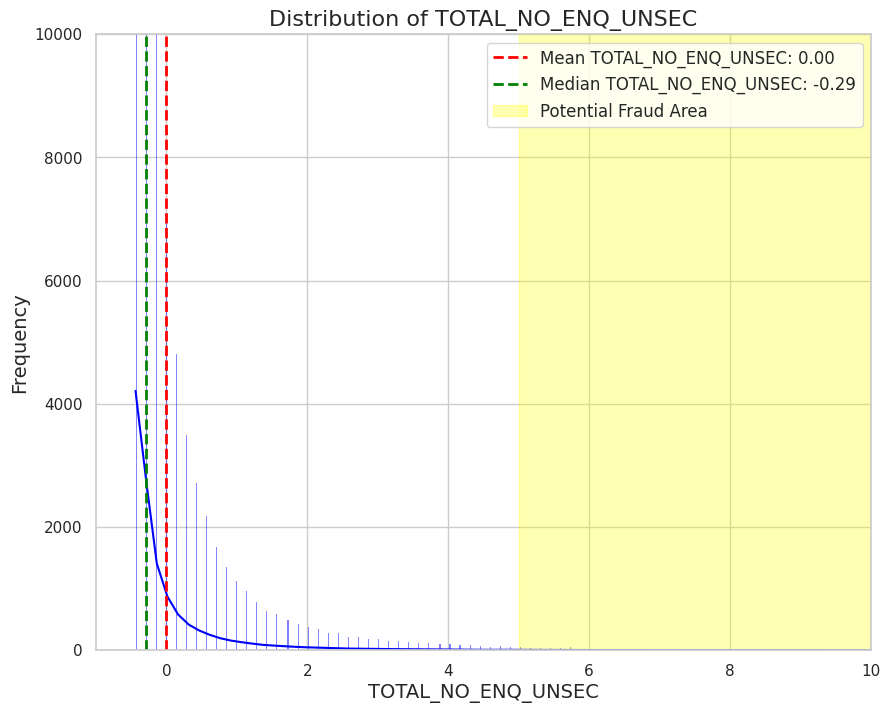

In [133]:
# TOTAL_NO_ENQ_UNSEC: Assuming above 5 might indicate fraud
plt.figure(figsize=(10,8))

sns.histplot(df['TOTAL_NO_ENQ_UNSEC'], kde=True, color='blue')
plt.title('Distribution of TOTAL_NO_ENQ_UNSEC', fontsize=16)
plt.xlabel('TOTAL_NO_ENQ_UNSEC', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

mean_enq_unsec = df['TOTAL_NO_ENQ_UNSEC'].mean()
median_enq_unsec = df['TOTAL_NO_ENQ_UNSEC'].median()

plt.axvline(mean_enq_unsec, color='red', linestyle='--', linewidth=2, label=f'Mean TOTAL_NO_ENQ_UNSEC: {mean_enq_unsec:.2f}')
plt.axvline(median_enq_unsec, color='green', linestyle='--', linewidth=2, label=f'Median TOTAL_NO_ENQ_UNSEC: {median_enq_unsec:.2f}')
plt.axvspan(5, df['TOTAL_NO_ENQ_UNSEC'].max(), color='yellow', alpha=0.3, label='Potential Fraud Area')

plt.legend(fontsize=12)
plt.xlim(-1, 10)
plt.ylim(0,10000)
plt.show()


# Yhi tk dekhna Iske neeche abhi mt dekhna Kr rha hu abhu

In [63]:
relevant_columns = [
    'PAYNIMO_STATUS', 'MATCH_SCORE', 'TOTAL_NO_LV_TRADELINES',
    'BUREAU_SCORE', 'NO_TRADELINES_OPENED_LAST_3M', 'NO_CD_OPENED_LAST_3M',
    'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_LAST_3M',
    'TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_UNSEC'
]
df_selected = df[relevant_columns]


In [65]:
'''conditions = (
    (df_selected['PAYNIMO_STATUS'].str.upper() == 'INVALID') |
    (df_selected['MATCH_SCORE'] < 50) |
    (df_selected['TOTAL_NO_LV_TRADELINES'] > 10) |
    (df_selected['BUREAU_SCORE'] < 600) |
    (df_selected['NO_TRADELINES_OPENED_LAST_3M'] > 3) |
    (df_selected['NO_CD_OPENED_LAST_3M'] > 2) |
    (df_selected['TOTAL_NO_LV_UNSEC'] > 5) |
    (df_selected['TOTAL_NO_ENQ'] > 10) |
    (df_selected['TOTAL_NO_ENQ_LAST_3M'] > 5) |
    (df_selected['TOTAL_NO_ENQ_CD'] > 3) |
    (df_selected['TOTAL_NO_ENQ_UNSEC'] > 5)
)

potential_fraud_customers = df_selected[conditions]
'''

"conditions = (\n    (df_selected['PAYNIMO_STATUS'].str.upper() == 'INVALID') |\n    (df_selected['MATCH_SCORE'] < 50) |\n    (df_selected['TOTAL_NO_LV_TRADELINES'] > 10) |\n    (df_selected['BUREAU_SCORE'] < 600) |\n    (df_selected['NO_TRADELINES_OPENED_LAST_3M'] > 3) |\n    (df_selected['NO_CD_OPENED_LAST_3M'] > 2) |\n    (df_selected['TOTAL_NO_LV_UNSEC'] > 5) |\n    (df_selected['TOTAL_NO_ENQ'] > 10) |\n    (df_selected['TOTAL_NO_ENQ_LAST_3M'] > 5) |\n    (df_selected['TOTAL_NO_ENQ_CD'] > 3) |\n    (df_selected['TOTAL_NO_ENQ_UNSEC'] > 5)\n)\n\npotential_fraud_customers = df_selected[conditions]\n"

In [66]:
#print(potential_fraud_customers.head())


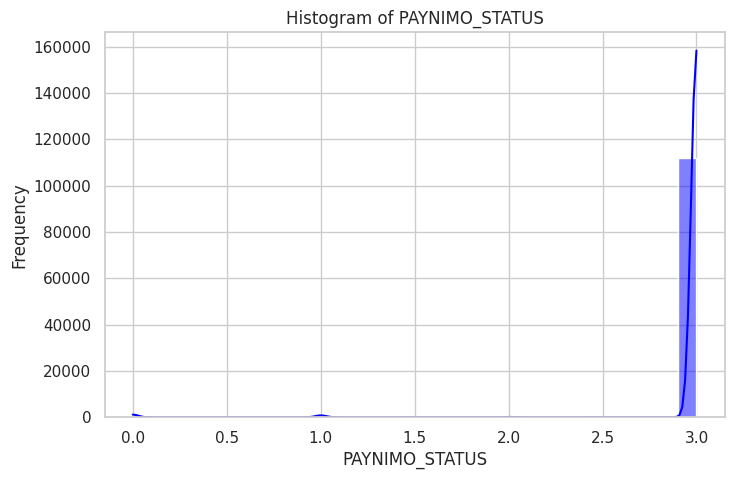

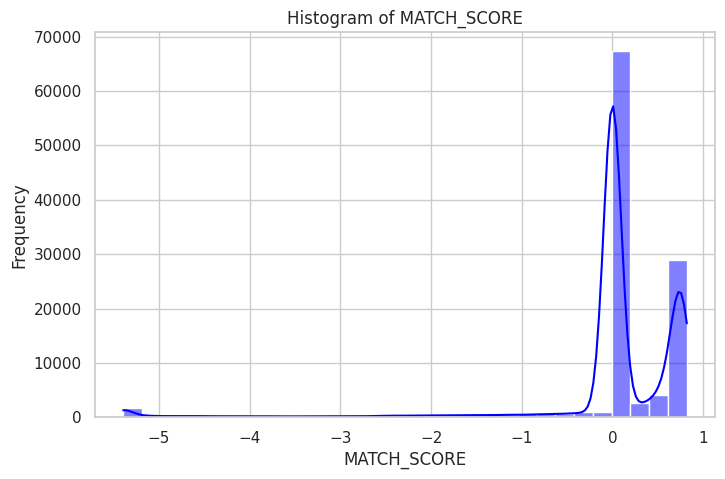

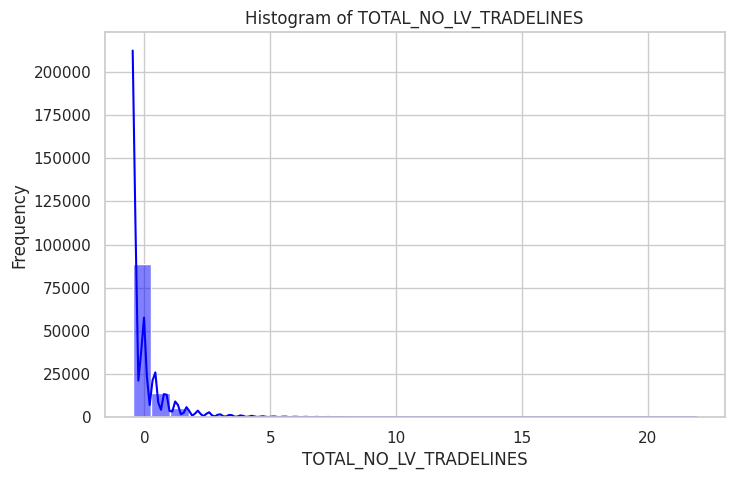

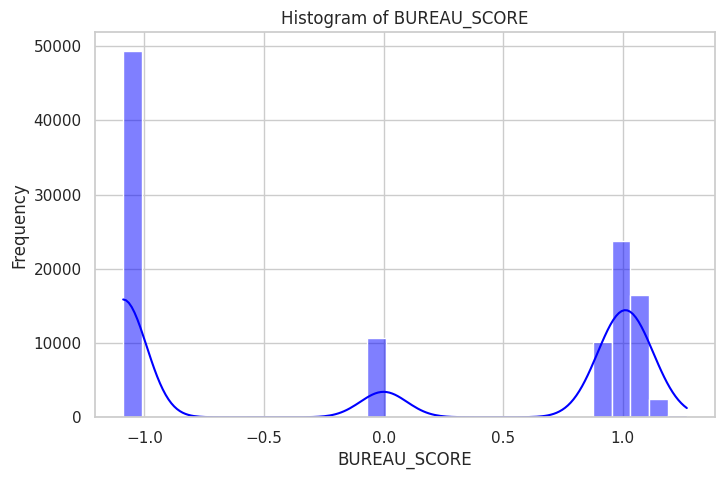

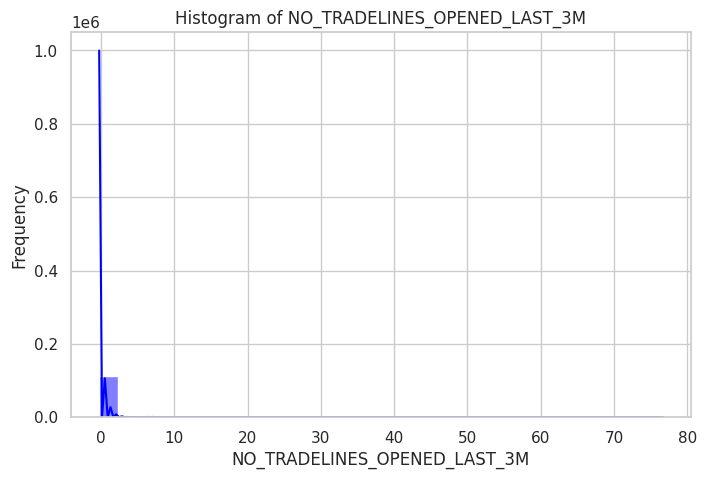

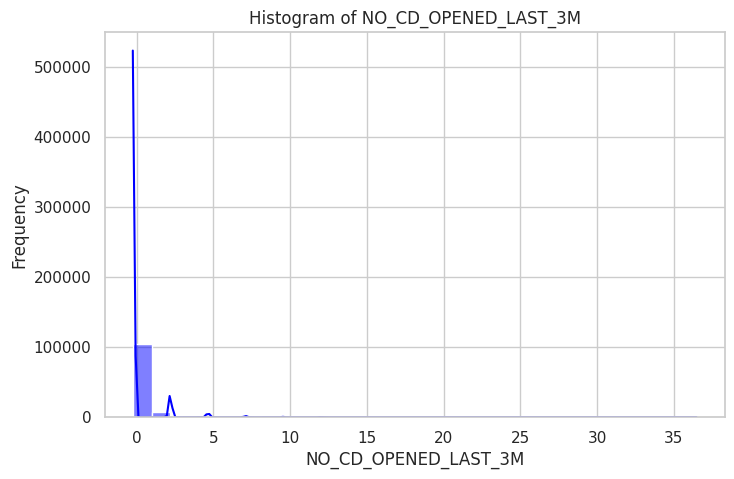

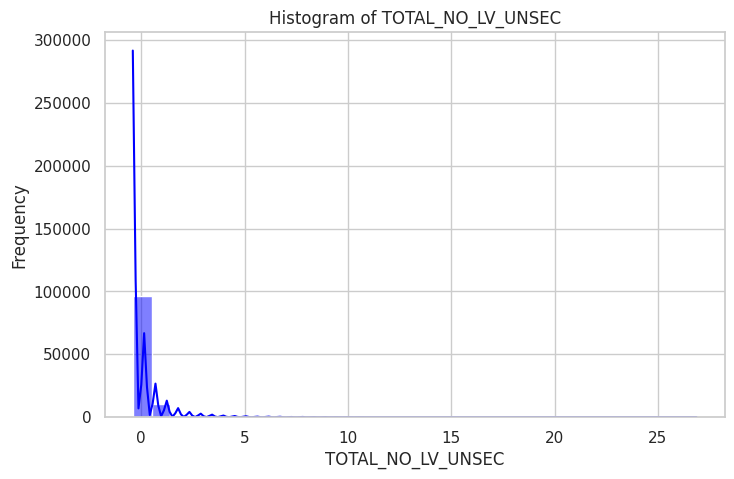

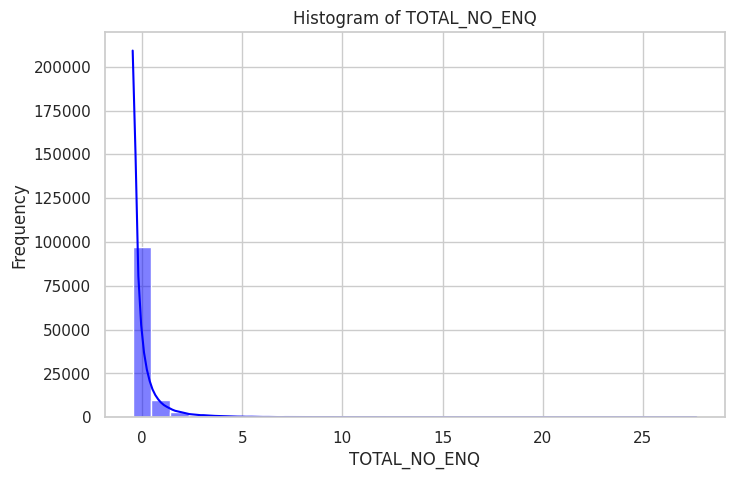

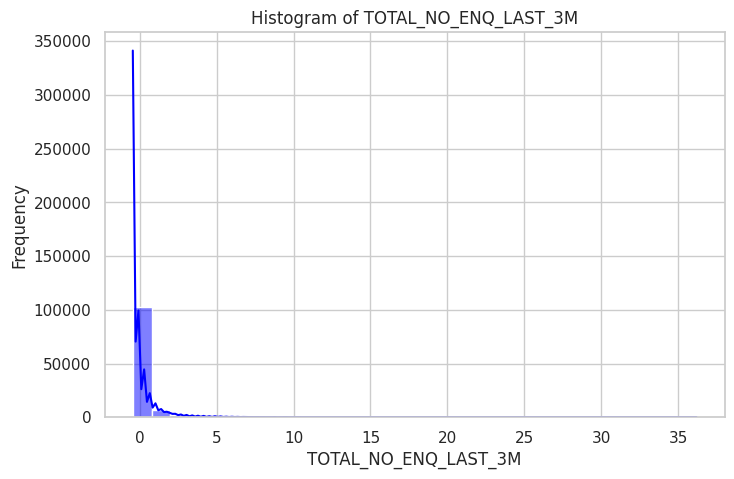

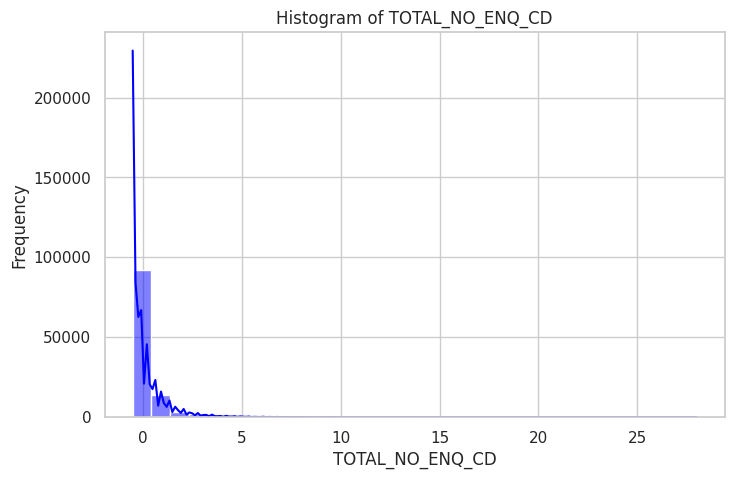

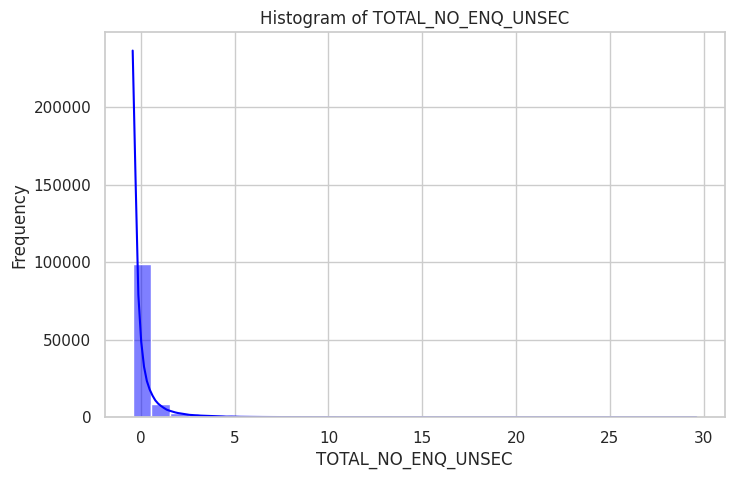

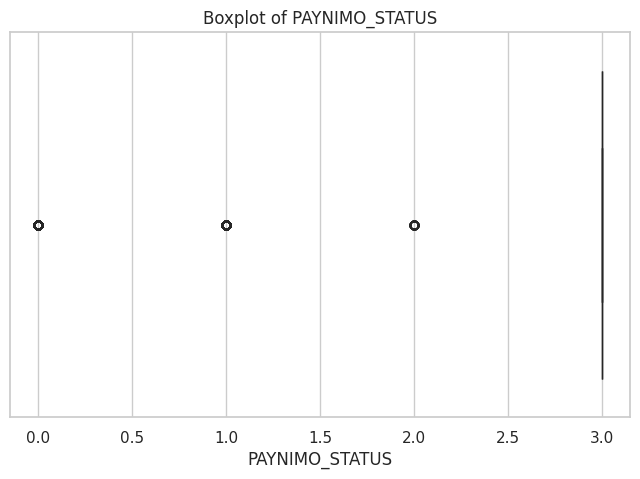

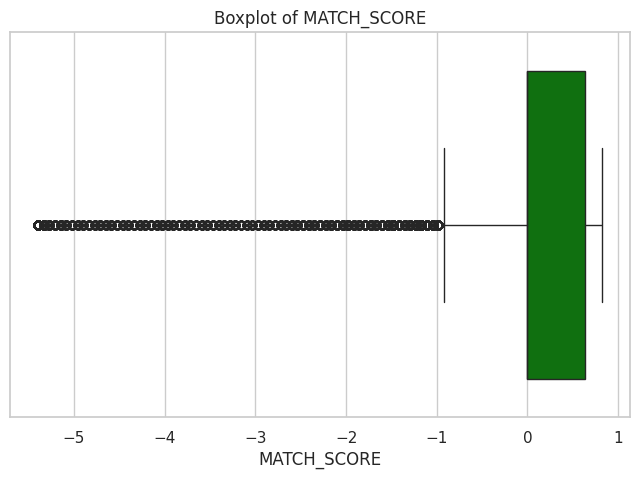

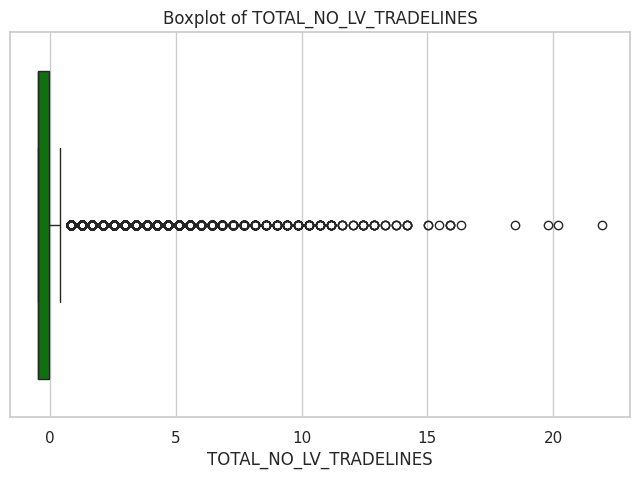

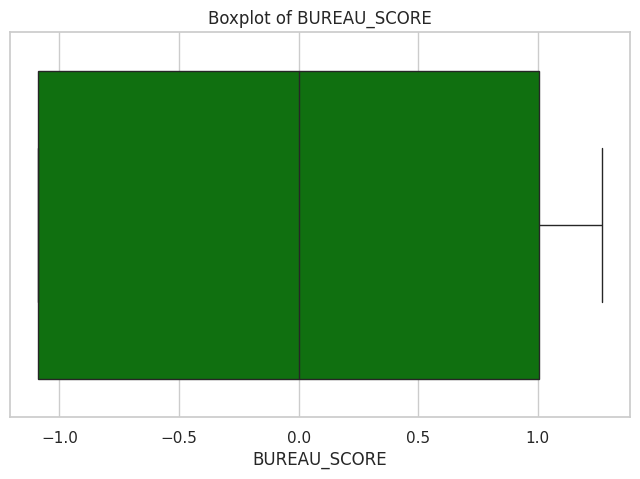

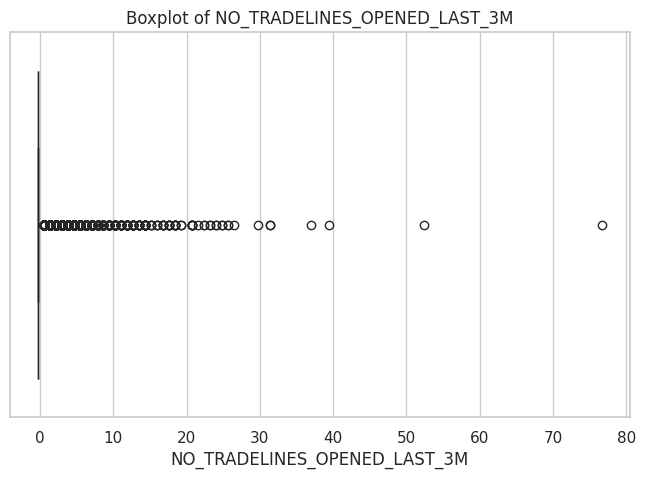

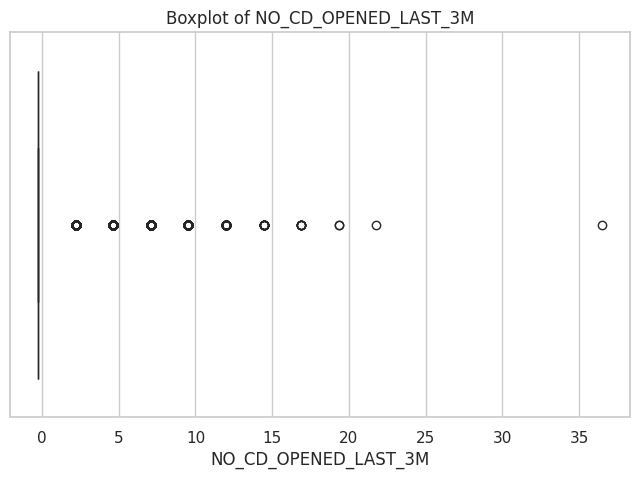

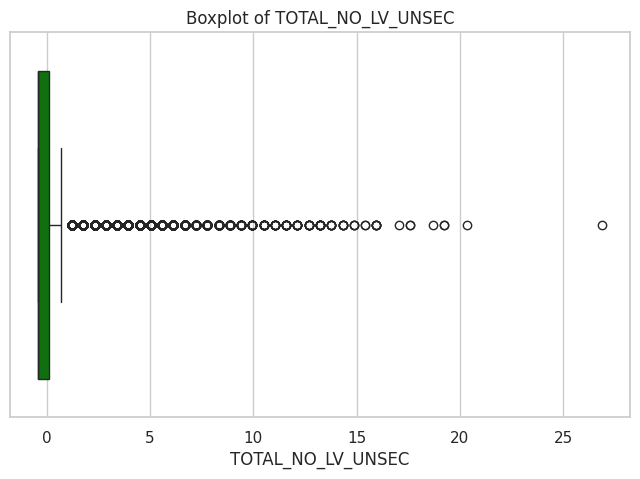

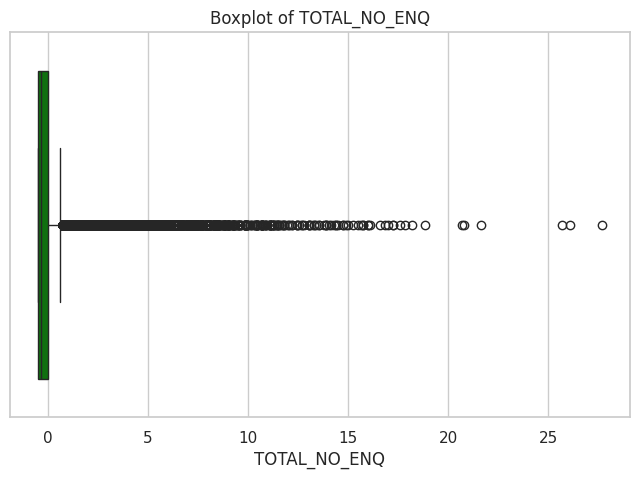

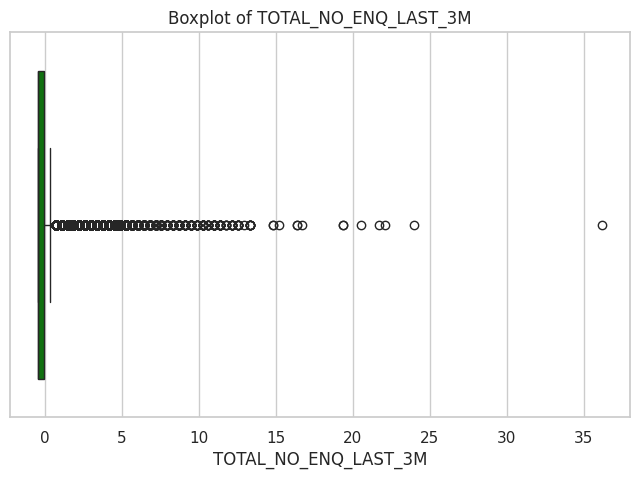

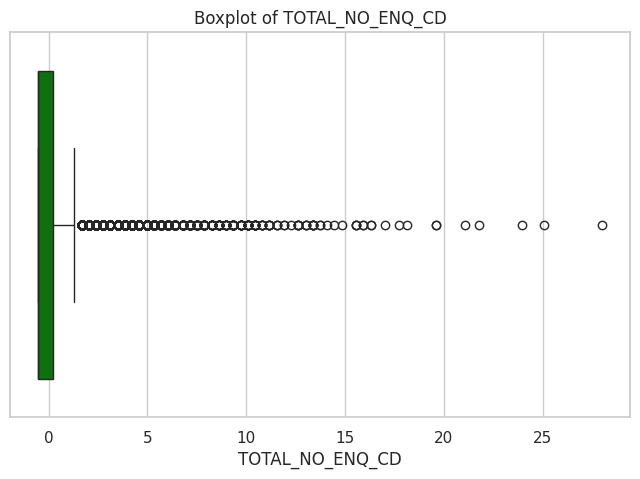

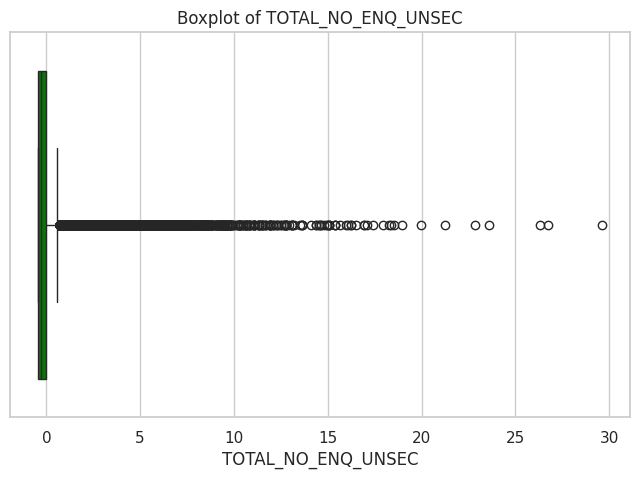

<ipython-input-67-8d676de84ed8>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PAYNIMO_STATUS', data=df, palette='Set2')


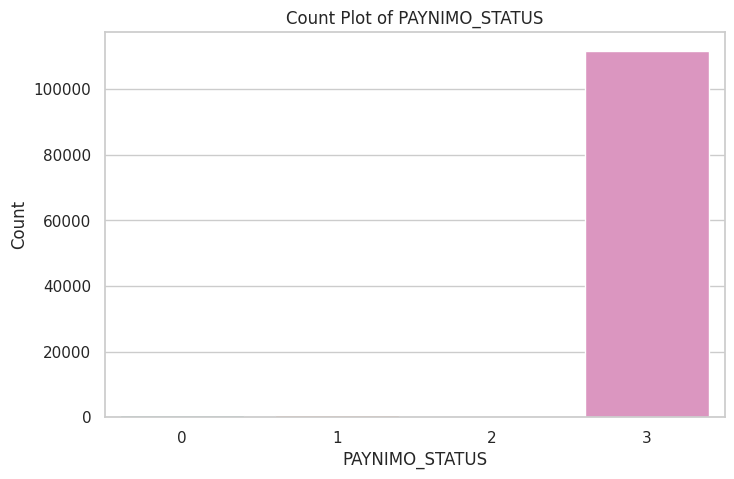

In [67]:
# Import the necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# List of columns that are important for fraud detection
important_columns = [
    'PAYNIMO_STATUS', 'MATCH_SCORE', 'TOTAL_NO_LV_TRADELINES',
    'BUREAU_SCORE', 'NO_TRADELINES_OPENED_LAST_3M', 'NO_CD_OPENED_LAST_3M',
    'TOTAL_NO_LV_UNSEC', 'TOTAL_NO_ENQ', 'TOTAL_NO_ENQ_LAST_3M',
    'TOTAL_NO_ENQ_CD', 'TOTAL_NO_ENQ_UNSEC'
]

# Plot histograms for numerical columns
for col in important_columns:
    if df[col].dtype != 'object':  # Check if the column is not categorical
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col], bins=30, kde=True, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Plot boxplots to visualize outliers
for col in important_columns:
    if df[col].dtype != 'object':  # Check if the column is not categorical
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[col], color='green')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

# Plot count plots for categorical data
if 'PAYNIMO_STATUS' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='PAYNIMO_STATUS', data=df, palette='Set2')
    plt.title('Count Plot of PAYNIMO_STATUS')
    plt.xlabel('PAYNIMO_STATUS')
    plt.ylabel('Count')
    plt.show()
